### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set 
### Total infected cases, total fatalities, total recovered

In [1]:
from covid_byweek import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(x_dat)

656

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'11-07-2021'

### Total CONFIRMED cases in the World changed by week


Week: 95 with lowest confirmed cases 0.0

Week: 66 with highest confirmed cases 5785203.0

Average confirmed by Week until now:  2630298.6631578947


,1,2,3,4,5,6,7,8,9,10,...,86,87,88,89,90,91,92,93,94,95
Total Confirmed changed by Week,2114.0,16779.0,40135.0,71204.0,78963.0,88345.0,109725.0,167012.0,338495.0,720366.0,...,224786892.0,228574219.0,231888750.0,234987253.0,237915747.0,240742629.0,243683811.0,246726280.0,249878373.0,249878373.0
Number of Confirmed every Week,2114.0,14665.0,23356.0,31069.0,7759.0,9382.0,21380.0,57287.0,171483.0,381871.0,...,3891804.0,3787327.0,3314531.0,3098503.0,2928494.0,2826882.0,2941182.0,3042469.0,3152093.0,0.0


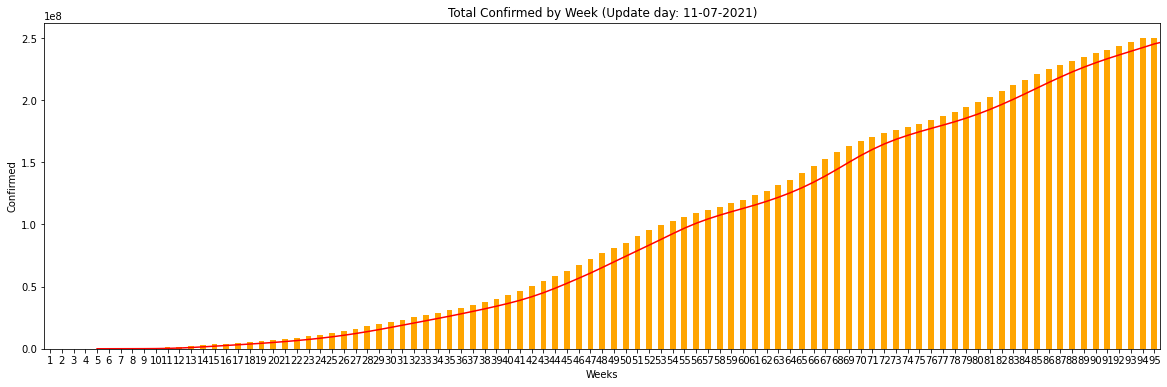

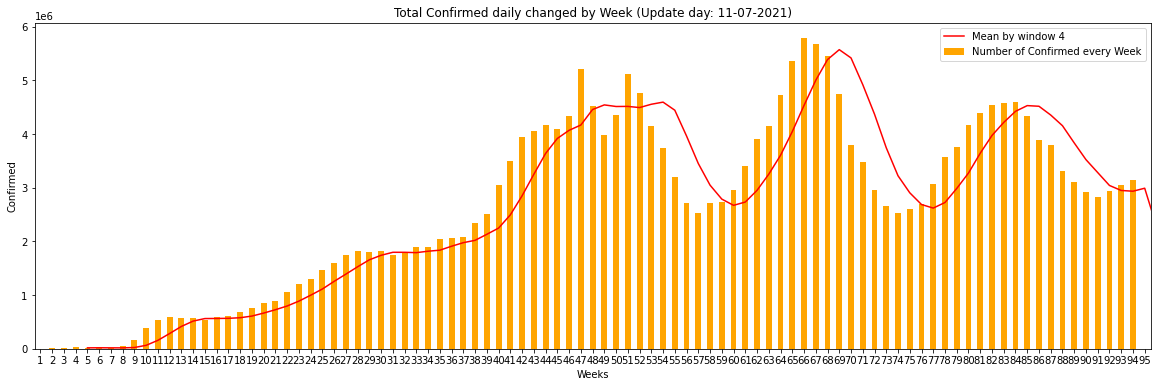

In [4]:
# time slot 4 weeks
window_slot = 4

# convert to DataFrame
x_weeks = [week for week, value in confirmedByWeek]
y_cases_total = [value for week, value in confirmedByWeek]
y_cases_byweek = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks = pd.DataFrame(columns=x_weeks, index=['Total Confirmed changed by Week', 'Number of Confirmed every Week'])
for week in weeks:
    confirmedweeks[week] = [y_cases_total[week-1], y_cases_byweek[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks.mask(confirmedweeks<0, 0, inplace=True)   

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total, color='Orange')
confirmedweeks.loc['Total Confirmed changed by Week'].plot.bar(color='orange')

roll = confirmedweeks.loc['Total Confirmed changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='red')

plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalconfirmed.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek, color='Orange')
confirmedweeks.loc['Number of Confirmed every Week'].plot.bar(color='orange')

roll = confirmedweeks.loc['Number of Confirmed every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='red')

plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed daily changed by Week (Update day: "+str(updated_date)+")")
plt.legend()
plt.savefig('output/week_totalconfirmed_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek)+1, "with lowest confirmed cases", y_cases_byweek[np.argmin(y_cases_byweek)])
print("\nWeek:", np.argmax(y_cases_byweek)+1, "with highest confirmed cases", y_cases_byweek[np.argmax(y_cases_byweek)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases_byweek))
confirmedweeks

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week


Week: 95 with lowest Fatalities cases 0.0

Week: 53 with highest Fatalities cases 100800.0

Average Fatalities by Week until now:  53150.242105263154


,1,2,3,4,5,6,7,8,9,10,...,86,87,88,89,90,91,92,93,94,95
Total Fatalities changed by Week,56.0,362.0,906.0,1770.0,2469.0,2997.0,3805.0,6453.0,14682.0,34149.0,...,4631236.0,4692695.0,4749457.0,4803459.0,4853112.0,4900368.0,4949654.0,5000096.0,5049273.0,5049273.0
Number of Fatalities every Week,56.0,306.0,544.0,864.0,699.0,528.0,808.0,2648.0,8229.0,19467.0,...,62425.0,61459.0,56762.0,54002.0,49653.0,47256.0,49286.0,50442.0,49177.0,0.0


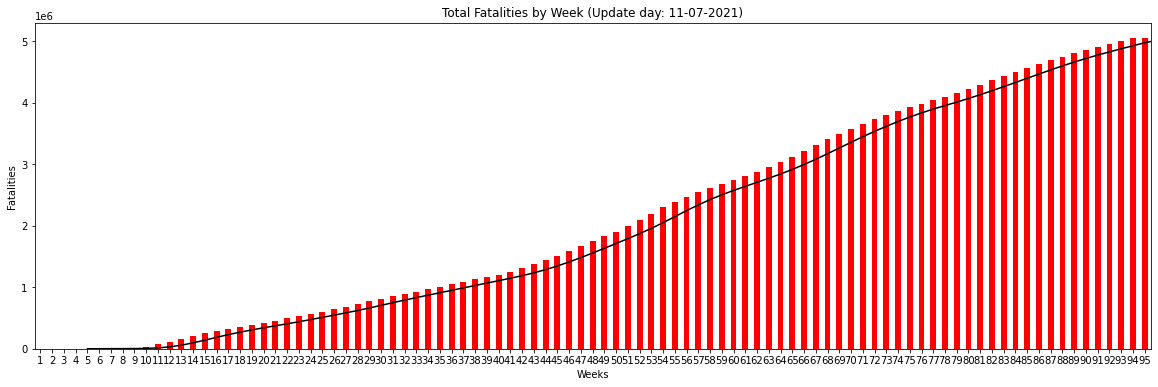

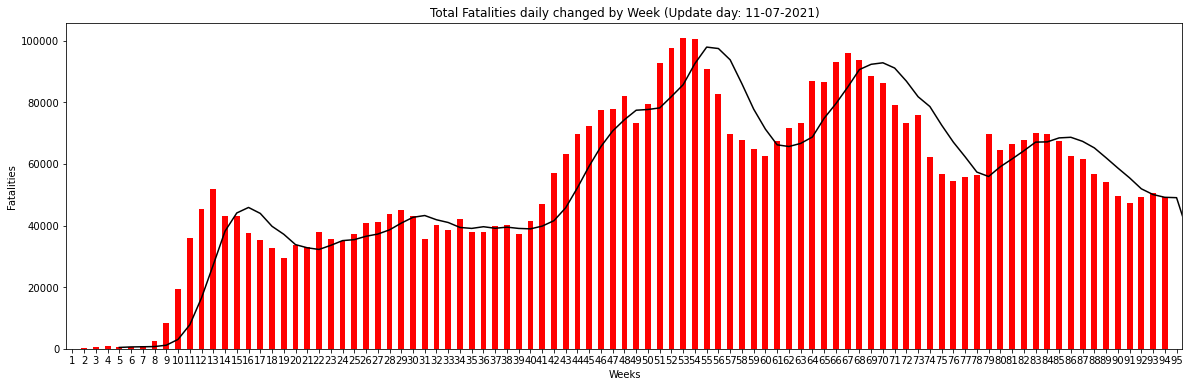

In [5]:
# convert to DataFrame
x_weeks = [week for week, value in deathsByWeek]
y_cases_total_deaths = [value for week, value in deathsByWeek]
y_cases_byweek_deaths = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_deaths = pd.DataFrame(columns=x_weeks, index=['Total Fatalities changed by Week', 'Number of Fatalities every Week'])
for week in weeks:
    confirmedweeks_deaths[week] = [y_cases_total_deaths[week-1], y_cases_byweek_deaths[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks_deaths.mask(confirmedweeks_deaths<0, 0, inplace=True)        

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total_deaths, color='Red')
confirmedweeks_deaths.loc['Total Fatalities changed by Week'].plot.bar(color='red')

roll = confirmedweeks_deaths.loc['Total Fatalities changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='black')

plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek_deaths, color='Red')
confirmedweeks_deaths.loc['Number of Fatalities every Week'].plot.bar(color='red')

roll = confirmedweeks_deaths.loc['Number of Fatalities every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='black')
    
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_deaths)+1, "with lowest Fatalities cases", y_cases_byweek_deaths[np.argmin(y_cases_byweek_deaths)])
print("\nWeek:", np.argmax(y_cases_byweek_deaths)+1, "with highest Fatalities cases", y_cases_byweek_deaths[np.argmax(y_cases_byweek_deaths)])
print("\nAverage Fatalities by Week until now: ", np.mean(y_cases_byweek_deaths))
confirmedweeks_deaths

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week

In [6]:
# # convert to DataFrame
# x_weeks = [week for week, value in recoveredByWeek]
# y_cases_total_recovered = [value for week, value in recoveredByWeek]
# y_cases_byweek_recovered = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]

# weeks = np.arange(1, max(x_weeks)+1, 1)
# confirmedweeks_recovered = pd.DataFrame(columns=x_weeks, index=['Total Recovered changed by Week', 'Number of Recovered every Week'])
# for week in weeks:
#     confirmedweeks_recovered[week] = [y_cases_total_recovered[week-1], y_cases_byweek_recovered[week-1]]

# # Mitigate the negative values by converting all negative values to 0
# confirmedweeks_recovered.mask(confirmedweeks_recovered<0, 0, inplace=True)
    
# # Plot total recovered
# plt.figure(1)
# plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# # plt.bar(x_weeks, y_cases_total_recovered, color='Green')
# confirmedweeks_recovered.loc['Total Recovered changed by Week'].plot.bar(color='Green')

# roll = confirmedweeks_recovered.loc['Total Recovered changed by Week'].rolling(window = window_slot)
# roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')

# plt.xlabel('Weeks')
# plt.ylabel('Recovered')
# plt.title("Total Recovered by Week (Update day: "+str(updated_date)+")")
# plt.savefig('output/week_totalrecovered.jpg')

# # Plot number of recovered every week
# plt.figure(2)
# plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# # plt.bar(x_weeks, y_cases_byweek_recovered, color='Green')
# confirmedweeks_recovered.loc['Number of Recovered every Week'].plot.bar(color='Green')

# roll = confirmedweeks_recovered.loc['Number of Recovered every Week'].rolling(window = window_slot)
# roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')

# plt.xlabel('Weeks')
# plt.ylabel('Recovered')
# plt.title("Total Recovered daily changed by Week (Update day: "+str(updated_date)+")")
# plt.savefig('output/week_totalrecovered_weekly.jpg')

# print("\nWeek:", np.argmin(y_cases_byweek_recovered)+1, "with lowest Recovered cases", y_cases_byweek_recovered[np.argmin(y_cases_byweek_recovered)])
# print("\nWeek:", np.argmax(y_cases_byweek_recovered)+1, "with highest Recovered cases", y_cases_byweek_recovered[np.argmax(y_cases_byweek_recovered)])
# print("\nAverage Recovered by Week until now: ", np.mean(y_cases_byweek_recovered))
# confirmedweeks_recovered

# # note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Since 03.2021 there was no recovered data in US. 
### More Information, see: 
### https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us
### https://github.com/CSSEGISandData/COVID-19/issues/3464